*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-05-22 20:40:34--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.009s  

2021-05-22 20:40:34 (5.63 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
import seaborn as sns

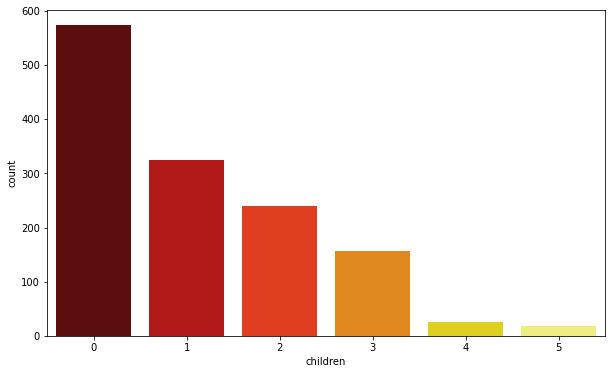

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'children', data = dataset, palette = 'hot', )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'colour'
  **contour_kws,


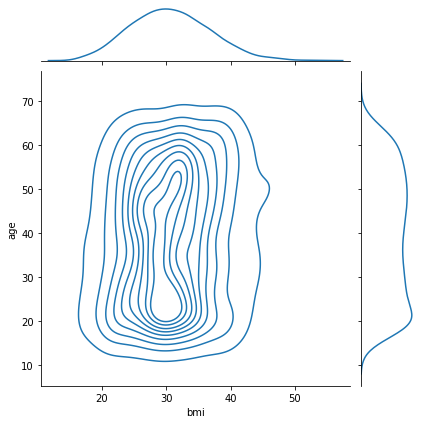

In [ ]:
sns.jointplot('bmi', 'age', data = dataset, kind = 'kde', colour = 'lime')

In [ ]:
dataset.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
columns = dataset.columns.values[[1,4,5]]
for column in columns:
    lab_enc = LabelEncoder()
    dataset[column] = lab_enc.fit_transform(dataset[column])
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


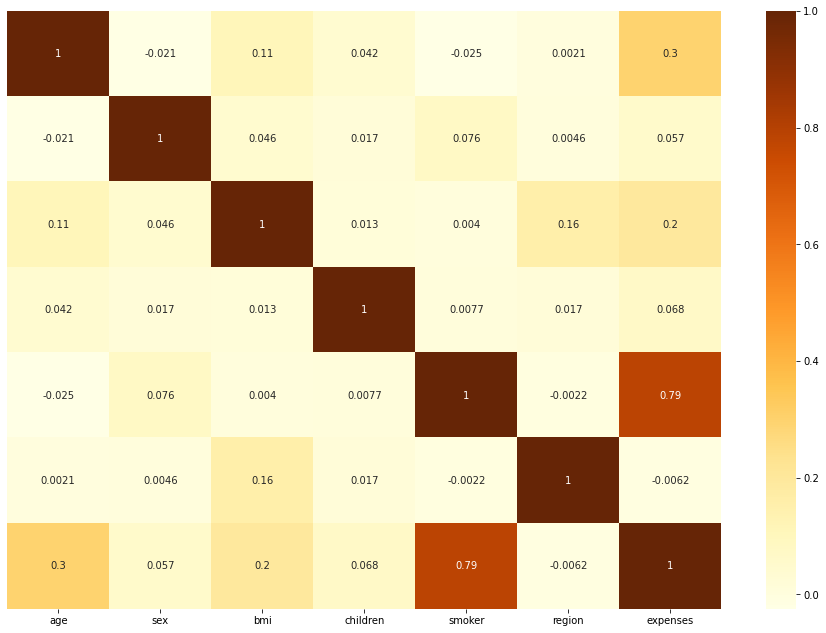

In [ ]:
plt.figure(figsize= (16,11))
sns.heatmap(dataset.corr(), cmap = 'YlOrBr', annot= True, yticklabels= False)

In [ ]:
labels = dataset['expenses']
dataset = dataset.drop('expenses', axis = 1)

In [ ]:
# Removing columns with p>|t|
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = labels, exog = dataset).fit()
regressor_OLS.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               expenses   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1537.
Date:                Sat, 22 May 2021   Prob (F-statistic):                        0.00
Time:                        20:40:37   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          199.5286     11.538     17.293      0.000     176.893     222.164
sex         -693.6797    347.996     -1.993      0.046   -1376.359     -11.000
bmi           62.3389     18.012      3.461      0.001      27.004      97.673
children     265.5190    144.134      1.842      0.066     -17.236     548.274
smoker      2.339e+04    433.200     54.005      0.000    2.25e+04    2.42e+04
region      -554.0638    159.443     -3.475      0.001    -866.851    -241.277
==============================================================================
Omnibus:                      272.475   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.445
Skew:                           1.120   Prob(JB):                    1.54e-136
Kurtosis:                       5.491   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dataset = dataset.drop('children', axis = 1)
dataset

,age,sex,bmi,smoker,region
0,19,0,27.9,1,3
1,18,1,33.8,0,2
2,28,1,33.0,0,2
3,33,1,22.7,0,1
4,32,1,28.9,0,1
...,...,...,...,...,...
1333,50,1,31.0,0,1
1334,18,0,31.9,0,0
1335,18,0,36.9,0,2
1336,21,0,25.8,0,3


In [ ]:
# Importing train test split
from sklearn.model_selection import train_test_split

In [ ]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(dataset, labels, test_size=0.2, random_state=101)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adam

In [ ]:
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
model.compile(loss='mean_absolute_error', optimizer= tf.optimizers.Adam(learning_rate=0.1), metrics = 'accuracy')

In [ ]:
model.fit(train_dataset, train_labels, epochs=300, verbose = 0)

9/9 - 0s - loss: 3166.7539 - accuracy: 0.0000e+00
Testing set Mean Abs Error: 3166.75 expenses
You passed the challenge. Great job!


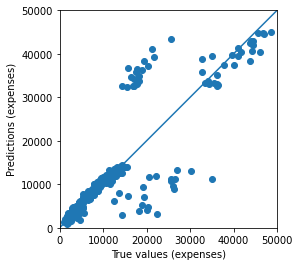

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
mae, acc = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
